# Data Visualisation Homework

### Take a notebook and try to analyse data with visualization to show some relevant information about Covid-19.

**Instructions:**
- You can use all the Python visualization libraries that you want.
- You need to use at least **3 different kinds of visualization**. 
- You need to have at least **5 plots** in your notebook.
- You need to **explain in few words each visualization** :
- Why did you choose this kind of visualization ?
- How is this visualization relevant to understand the dataset ? 


**Data to use:** https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

**Data Description:** https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

-------------------------------

**Github repository: https://github.com/ZofiaSamsel/Data_Visualisation_Covid_19**



In [ ]:
!pip install bar_chart_race

In [17]:
import bar_chart_race as bcr
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score


In [2]:
sns.set_style('whitegrid')

### Load dataset 

In [3]:
covid = pd.read_csv('owid-covid-data.csv', sep=',')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Cleaning

1. **Selecting only the columns I will use in my visualizations.**
2. *Creating new columns* `weekly_date` and `year_date` to have weekly and yearly summaries instead of daily.
3. Removing the locations that incorrectly represented countries instead of other locations.
4. Changing all NaN values related to `total_cases`, `new_cases`, `total_deaths`, `new_deaths` to 0 because they represent the lack of cases at the beginning of the pandemic.
5. Keeping all NaN values related to `people_fully_vaccinated` because they represent dates without connected information. In situations where I use this data, I will delete all rows lacking vaccination information.
6. Modifying the names of `locations` to match GeoPandas.



In [5]:
covid_cleaned = covid[[
    'iso_code',
    'continent',
    'location',
    'date',
    'total_cases',
    'new_cases',
    'total_deaths',
    'new_deaths',
    'people_fully_vaccinated', 
    'population',
    #'population_density',
    #'life_expectancy',
    'gdp_per_capita',
    #'human_development_index'
    ]].copy()


covid_cleaned['date'] = pd.to_datetime(covid_cleaned['date'])

#week column
date_week = pd.DataFrame({'weekly_date': covid_cleaned['date'].dt.strftime('%Y-%m-w%U')})
covid_cleaned = pd.concat([covid_cleaned, date_week], axis=1)

#month column
date_month = pd.DataFrame({'monthly_date': covid_cleaned['date'].dt.strftime('%Y-%m')})
covid_cleaned = pd.concat([covid_cleaned, date_month], axis=1)

#drop NaN
covid_cleaned = covid_cleaned[covid_cleaned['continent'].notna()]
covid_cleaned = covid_cleaned[covid_cleaned['gdp_per_capita'].notna()]

#covid_cleaned.loc[covid_cleaned['date'] <= '2020-04-01', ['total_cases', 'new_cases', "total_deaths", 'new_deaths']] = covid_cleaned.loc[
    #covid_cleaned['date'] <= '2020-11-10', ['total_cases', 'new_cases', "total_deaths", 'new_deaths']].fillna(0)
covid_cleaned[['total_cases', 'new_cases', "total_deaths", 'new_deaths']] = covid_cleaned[[
    'total_cases', 'new_cases', "total_deaths", 'new_deaths']].fillna(0)

#location names change
covid_cleaned['location'] = covid_cleaned['location'].replace('United States','United States of America') 
covid_cleaned['location'] = covid_cleaned['location'].replace('Democratic Republic of Congo','Dem. Rep. Congo')
covid_cleaned['location'] = covid_cleaned['location'].replace('South Sudan','S. Sudan')
covid_cleaned['location'] = covid_cleaned['location'].replace('Central African Republic','Central African Rep.')
covid_cleaned['location'] = covid_cleaned['location'].replace("Cote d'Ivoire","Côte d'Ivoire")


covid_cleaned[3500:3505]


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,people_fully_vaccinated,population,gdp_per_capita,weekly_date,monthly_date
4907,DZA,Africa,Algeria,2021-11-19,208532.0,152.0,6009.0,4.0,NaN,44903228.0,13913.839,2021-11-w46,2021-11
4908,DZA,Africa,Algeria,2021-11-20,208695.0,163.0,6015.0,6.0,NaN,44903228.0,13913.839,2021-11-w46,2021-11
4909,DZA,Africa,Algeria,2021-11-21,208839.0,144.0,6017.0,2.0,5298544.0,44903228.0,13913.839,2021-11-w47,2021-11
4910,DZA,Africa,Algeria,2021-11-22,208952.0,113.0,6021.0,4.0,5314016.0,44903228.0,13913.839,2021-11-w47,2021-11
4911,DZA,Africa,Algeria,2021-11-23,209111.0,159.0,6026.0,5.0,NaN,44903228.0,13913.839,2021-11-w47,2021-11


In [6]:
#checking NaNs
covid_cleaned.isna().sum()

iso_code                        0
continent                       0
location                        0
date                            0
total_cases                     0
new_cases                       0
total_deaths                    0
new_deaths                      0
people_fully_vaccinated    219202
population                      0
gdp_per_capita                  0
weekly_date                     0
monthly_date                    0
dtype: int64

### **Total Cases and Vaccinations per population in European countries**

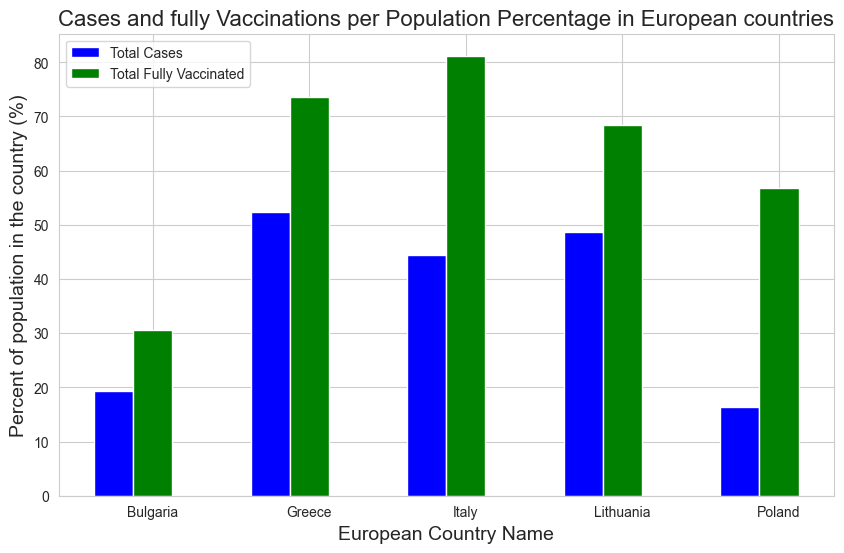

In [7]:
#choosing data
df_vaccinations = covid_cleaned[(covid_cleaned['location']. isin(['Bulgaria', 'Greece',  'Italy', 'Lithuania', 'Poland'])) & (covid_cleaned['date'] == '2023-11-01')].copy()

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
bar_positions_cases = range(len(df_vaccinations['location']))
bar_positions_vaccinations = [pos + bar_width for pos in bar_positions_cases]

# Plot total cases
ax.bar(bar_positions_cases, df_vaccinations['total_cases']/df_vaccinations['population']*100, bar_width, label='Total Cases', color='blue')

# Plot total vaccinations on a separate axis
ax.bar(bar_positions_vaccinations, df_vaccinations['people_fully_vaccinated']/df_vaccinations['population']*100, bar_width, label='Total Fully Vaccinated', color='green')

# Customize the primary x-axis
ax.set_xticks([pos + bar_width for pos in bar_positions_cases])
ax.set_xticklabels(df_vaccinations['location'])
ax.set_xlabel('European Country Name', fontsize=14)
ax.set_ylabel('Percent of population in the country (%)', fontsize=14)
ax.set_title('Cases and fully Vaccinations per Population Percentage in European countries', fontsize=16)
ax.legend(loc='upper left')

plt.show()

**Description:** The graph shows the number of cases and full vaccinations per population percentage in European countries. The countries with the highest percentage of fully vaccinated people are Portugal, Malta, and Belgium. The countries with the highest number of cases per population percentage are Bulgaria, Greece, and Italy.

This suggests that there is a correlation between vaccination rates and the number of cases per population percentage. In other words, countries with higher vaccination rates tend to have lower rates of cases.

### **Total Cases of Covid-19 vs GDP Per Capita**

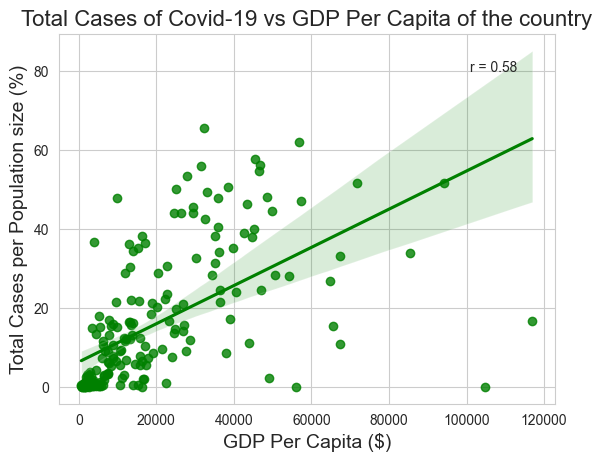

In [8]:
#choose data
covid_cleaned_date = covid_cleaned[covid_cleaned['date'] == '2022-10-04']

pearson_corr = covid_cleaned_date['gdp_per_capita'].corr(covid_cleaned_date['total_cases']/covid_cleaned_date['population'])

#plot graph
sns.regplot(data=covid_cleaned_date, 
            x=covid_cleaned_date['gdp_per_capita'], 
            y=(covid_cleaned_date['total_cases']/covid_cleaned_date['population'])*100,
            color = 'green')

#description
plt.xlabel('GDP Per Capita ($)', fontsize=14)
plt.ylabel('Total Cases per Population size (%)', fontsize=14)
plt.title('Total Cases of Covid-19 vs GDP Per Capita of the country', fontsize=16)
plt.text(101000,80,f'r = {pearson_corr:.2f}')

plt.show()

**Description:** 
The scatter plot shows the relationship between total cases of COVID-19 per million population and GDP per capita. There is a positive correlation between the two variables, with a correlation coefficient of 0.58. This may suggest that countries with higher GDP per capita tend to have lower total cases of COVID-19 per million population.

### **Number of new cases and new deaths in Poland (January 2020 - November 2023)**

In [9]:
#preparing weekly dataset
covid_week = covid_cleaned.groupby(['location','weekly_date']).agg({
    'total_cases': 'last',
    'new_cases':'sum', 
    'new_deaths' :'sum',
    'total_deaths': 'last',
    'population': 'last',
    }).reset_index('location').reset_index('weekly_date')
covid_week[1030:1035]

,weekly_date,location,total_cases,new_cases,new_deaths,total_deaths,population
1030,2021-01-w00,Antigua and Barbuda,159.0,1.0,0.0,5.0,93772.0
1031,2021-01-w01,Antigua and Barbuda,167.0,8.0,0.0,5.0,93772.0
1032,2021-01-w02,Antigua and Barbuda,184.0,17.0,1.0,6.0,93772.0
1033,2021-01-w03,Antigua and Barbuda,192.0,8.0,0.0,6.0,93772.0
1034,2021-01-w04,Antigua and Barbuda,218.0,26.0,0.0,6.0,93772.0


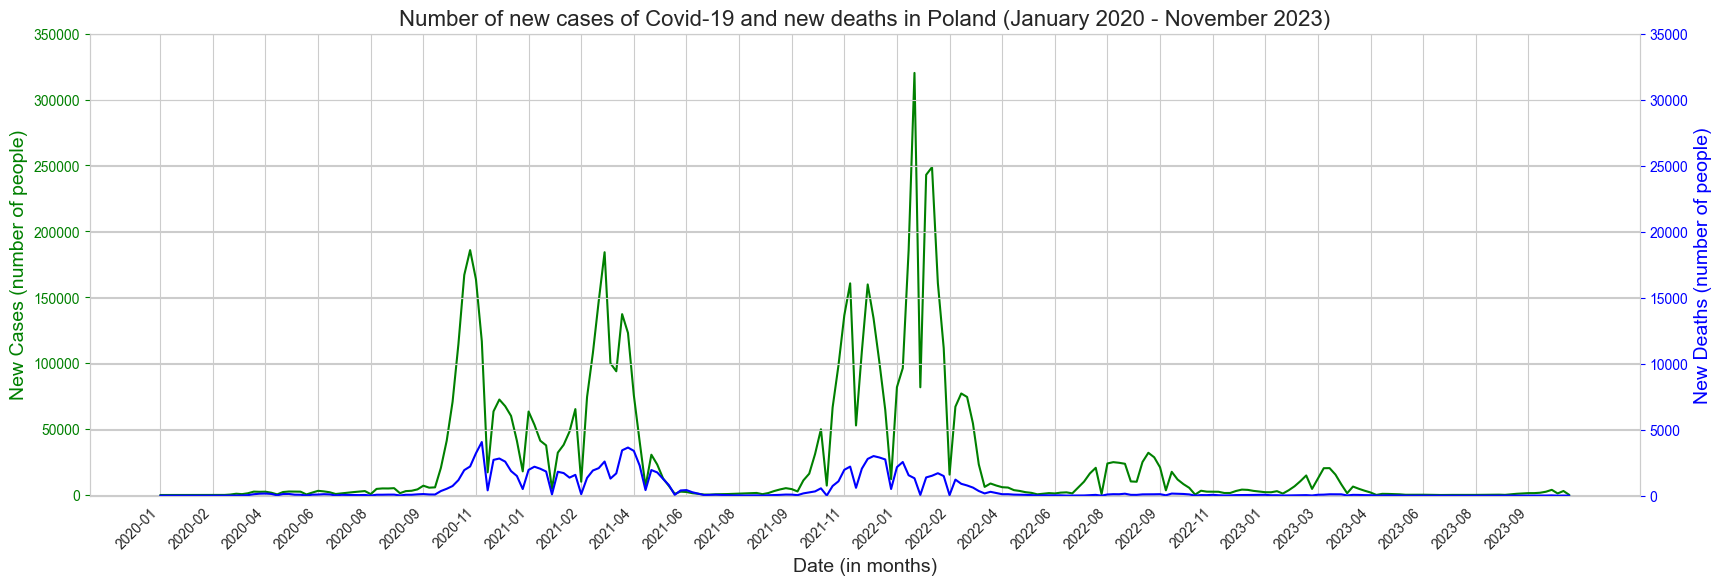

In [10]:
#choosing data
poland_weekly_data = covid_week[(covid_week['location'] == 'Poland')]

#preparing conva
fig, ax1 = plt.subplots(figsize=(20, 6))

# total cases
ax1.plot(poland_weekly_data['weekly_date'], poland_weekly_data['new_cases'], linestyle='-', color='green', label='New Cases')
ax1.set_xticks(poland_weekly_data['weekly_date'][::9])
ax1.set_xticklabels(poland_weekly_data['weekly_date'][::9].str[:-4], rotation=45, ha='right')

#description
ax1.set_ylim(ymax=350000)
ax1.set_ylim(ymin=-500)
ax1.set_xlabel('Date (in months)', fontsize=14)
ax1.set_ylabel('New Cases (number of people)', color='green', fontsize=14)
ax1.tick_params('y', colors='green')

# total deaths
ax2 = ax1.twinx()
ax2.plot(poland_weekly_data['weekly_date'], poland_weekly_data['new_deaths'], linestyle='-', color='blue', label='New Deaths')

#description
ax2.set_ylabel('New Deaths (number of people)', color='blue', fontsize=14)
ax2.tick_params('y', colors='blue')
ax2.set_ylim(ymax = 35000)
ax2.set_ylim(ymin=0)

plt.title('Number of new cases of Covid-19 and new deaths in Poland (January 2020 - November 2023)', fontsize=16)
plt.show()

**Description:** The graphs depict the daily counts of new Covid-19 cases and deaths in Poland throughout the ongoing pandemic. There were two periods when the pandemic peaked in Poland: September 2020 to June 2021 and September 2021 to April 2022. These periods coincide with an increase in the number of deaths. Since then, the pandemic has been declining.

### **Total number of cases of Covid-19 in the World till November 2023**

C:\Users\zosia\AppData\Local\Temp\ipykernel_17416\1738015434.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


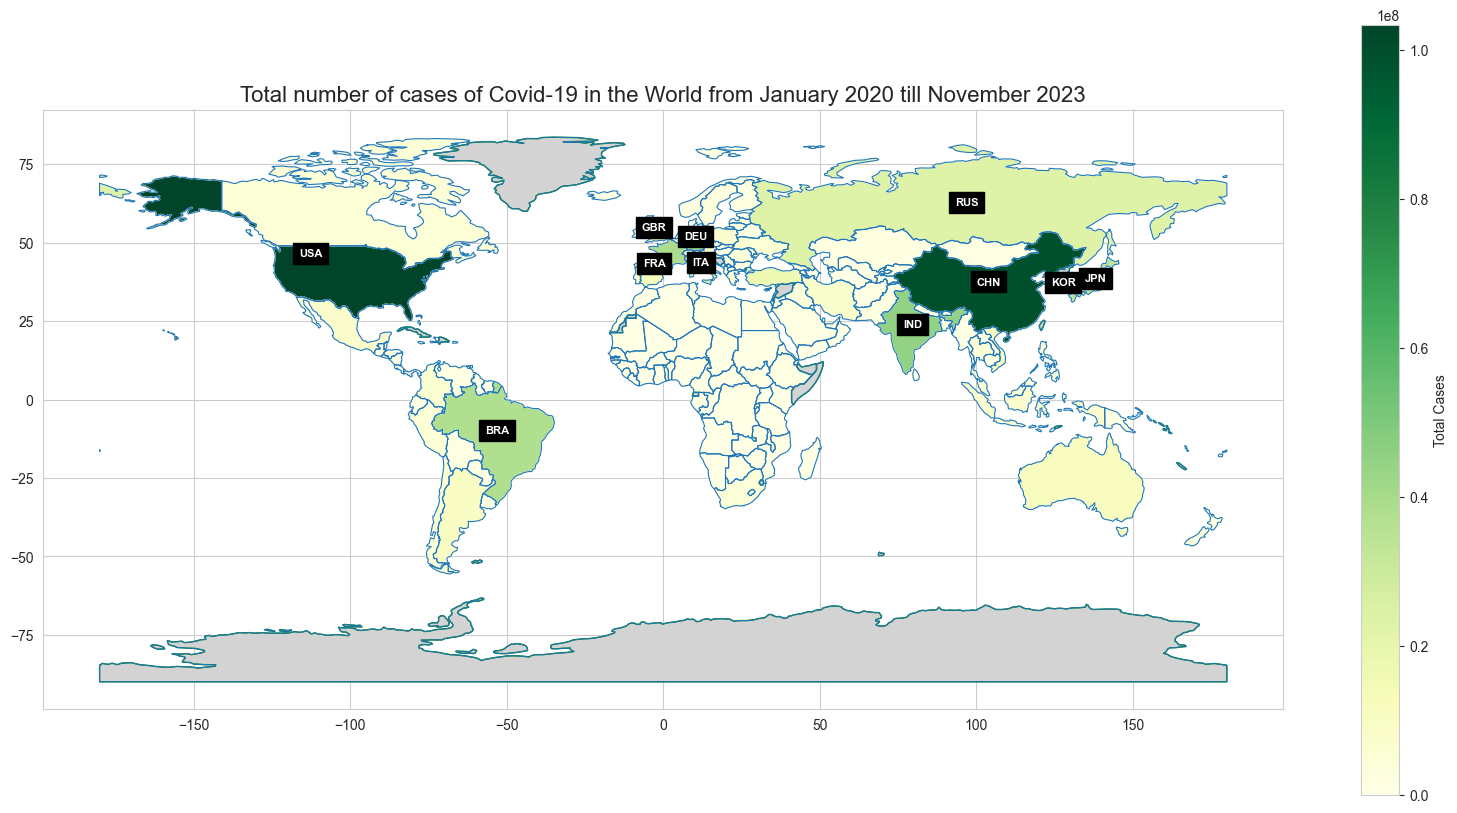

In [11]:
#Choosing the date for the graph
data_november = covid_cleaned[covid_cleaned['date'] == '2023-11-09']

#merging df with GeoPandas countries geographic location 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
covid_with_location = world.merge(data_november, how='left', left_on='name', right_on='location')

#creating canva with the map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
covid_with_location.boundary.plot(ax=ax, linewidth=0.8)


#Map Plot
covid_with_location.plot(ax=ax, 
                 column='total_cases', 
                 cmap='YlGn', 
                 legend=True,
                 legend_kwds={'label': "Total Cases"},     
                 missing_kwds={
                    "color": "lightgrey",
                    "edgecolor": "green",
                    "label": "Missing values",
                })

#adding countries names
covid_with_location.apply(lambda x: 
                          ax.annotate(text=str(x['iso_a3']), xy=x.geometry.centroid.coords[0], ha='center', weight='bold', color='white', size=8, backgroundcolor='black')
                          if (x['total_cases'] >= 20000000) else ' ', 
                          axis=1)


plt.title('Total number of cases of Covid-19 in the World from January 2020 till November 2023', size = 16)
plt.show()

**Description:** The presented graph provides a visual representation of the distribution of Covid-19 cases across countries on a world map. Notably, the USA and China emerge as the nations with the highest number of reported cases. A compelling observation is the relatively low number of cases in Africa, raising questions about the potential impact of data collection challenges in the region.

### Differently: **Number of Total Cases of Covid-19 in different countries from January 2020 to November 2023 (monthly)**

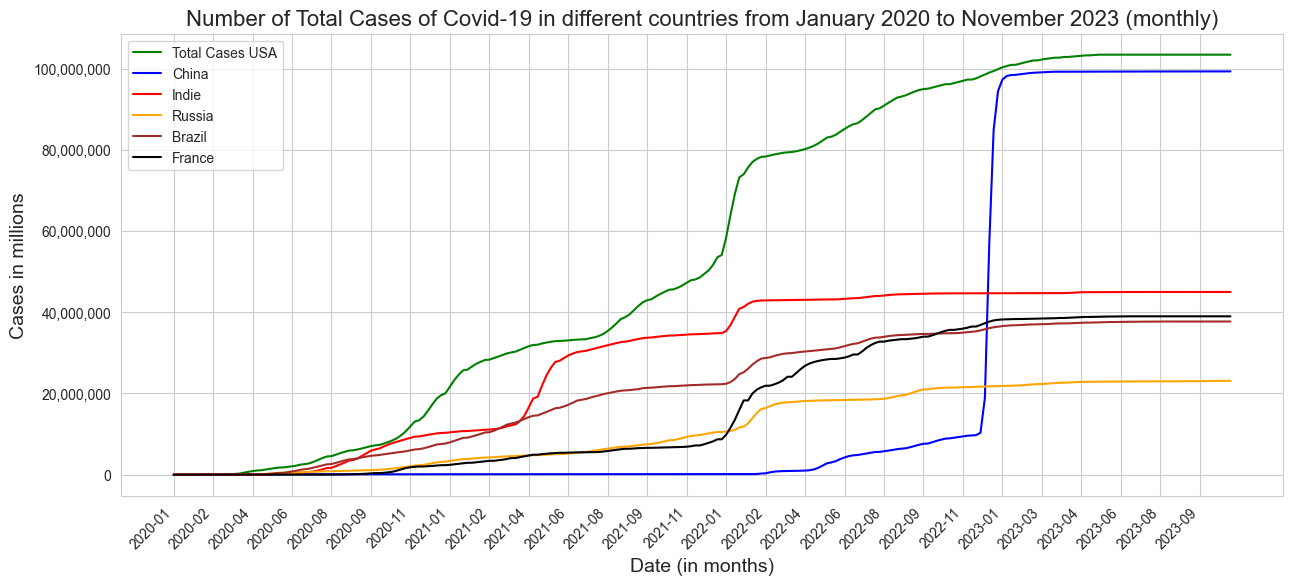

In [12]:
#choosing data
usa_weekly_data = covid_week[covid_week['location'] == 'United States of America']
china_weekly_data = covid_week[covid_week['location'] == 'China']
indie_weekly_data = covid_week[covid_week['location'] == 'India']
russia_weekly_data = covid_week[covid_week['location'] == 'Russia']
brazil_weekly_data = covid_week[covid_week['location'] == 'Brazil']
france_weekly_data = covid_week[covid_week['location'] == 'France']

# create the canve
fig, ax = plt.subplots(figsize=(15, 6))

# Plot total cases for each of the coutries
ax.plot(usa_weekly_data['weekly_date'], usa_weekly_data['total_cases'], linestyle='-', color='green', label='Total Cases USA')
ax.plot(china_weekly_data['weekly_date'], china_weekly_data['total_cases'], linestyle='-', color='blue', label='China')
ax.plot(indie_weekly_data['weekly_date'], indie_weekly_data['total_cases'], linestyle='-', color='red', label='Indie')
ax.plot(russia_weekly_data['weekly_date'], russia_weekly_data['total_cases'], linestyle='-', color='orange', label='Russia')
ax.plot(brazil_weekly_data['weekly_date'], brazil_weekly_data['total_cases'], linestyle='-', color='brown', label='Brazil')
ax.plot(france_weekly_data['weekly_date'], france_weekly_data['total_cases'], linestyle='-', color='black', label='France')

#add description to the graph
ax.set_xlabel('Date (in months)', fontsize=14)
ax.set_ylabel('Cases in millions', fontsize=14)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

ax.set_xticks(usa_weekly_data['weekly_date'][::9])
ax.set_xticklabels(usa_weekly_data['weekly_date'][::9].str[:-4], rotation=45, ha='right')
plt.title('Number of Total Cases of Covid-19 in different countries from January 2020 to November 2023 (monthly)', fontsize=16)
plt.legend()
plt.show()


**Description:** The graph illustrates the cumulative count of Covid-19 cases over time. Notably, China and the USA stand out with the highest number of cases, approximately double that of other countries. Since March 2023, the overall number of cases has plateaued.

Interestingly, China experienced a particularly intense increase in cases towards the end of 2022. This anomaly may be attributed to data presentation issues. It raises questions about the consistency of data reporting during that period.

### **The number of deaths by country from January 2020 till November 2023**

In [26]:
#preparing monthly dataset
covid_month = covid_cleaned.groupby(['location','monthly_date']).agg({
    'total_cases': 'last',
    'continent': 'last',
    'new_cases':'sum', 
    'new_deaths' :'sum',
    'total_deaths': 'last',
    'population': 'last',
    }).reset_index('location').reset_index('monthly_date')
covid_month[1030:1034]

,monthly_date,location,total_cases,continent,new_cases,new_deaths,total_deaths,population
1030,2023-08,Bolivia,1208109.0,South America,1230.0,2.0,22401.0,12224114.0
1031,2023-09,Bolivia,1208927.0,South America,818.0,3.0,22404.0,12224114.0
1032,2023-10,Bolivia,1209619.0,South America,692.0,3.0,22407.0,12224114.0
1033,2023-11,Bolivia,1209619.0,South America,0.0,0.0,22407.0,12224114.0


In [27]:
#preparation of dataset
covid_bar_anim = covid_month[['location', 'monthly_date', 'total_deaths']][covid_month['continent']=='Europe'].copy()
covid_bar_anim = covid_bar_anim.pivot(index= "monthly_date", columns='location', values='total_deaths')
covid_bar_anim.reset_index(inplace=True)
covid_bar_anim = covid_bar_anim.fillna(0).set_index('monthly_date')

covid_bar_anim.tail()

location,Albania,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,Denmark,...,Russia,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
monthly_date,,,,,,,,,,,,,,,,,,,,,
2023-07,3604.0,22534.0,7118.0,34339.0,16352.0,38397.0,18282.0,1364.0,42815.0,8765.0,...,399814.0,125.0,18057.0,21167.0,9431.0,121852.0,24663.0,14044.0,109918.0,228985.0
2023-08,3604.0,22534.0,7118.0,34339.0,16352.0,38403.0,18297.0,1364.0,42821.0,8790.0,...,399983.0,126.0,18057.0,21167.0,9437.0,121852.0,24723.0,14052.0,109918.0,229762.0
2023-09,3604.0,22534.0,7118.0,34339.0,16354.0,38414.0,18351.0,1364.0,42851.0,8824.0,...,400047.0,126.0,18057.0,21167.0,9453.0,121852.0,24837.0,14062.0,109918.0,230945.0
2023-10,3604.0,22534.0,7118.0,34339.0,16364.0,38456.0,18438.0,1364.0,42927.0,8824.0,...,400256.0,126.0,18057.0,21167.0,9467.0,121852.0,25078.0,14080.0,109918.0,231324.0
2023-11,3604.0,22534.0,7118.0,34339.0,16364.0,38456.0,18438.0,1364.0,42948.0,8824.0,...,400256.0,126.0,18057.0,21167.0,9467.0,121852.0,25078.0,14080.0,109918.0,231324.0


In [44]:
# Create the bar chart race
plt = bcr.bar_chart_race(covid_bar_anim, 
                         filename=None ,   
                         n_bars=7, 
                         figsize=(5, 3), 
                         steps_per_period=20, 
                         period_length=1500,
                         fixed_order=False,
                         fixed_max=True,
                         interpolate_period=False,
                         label_bars=True,
                         title='COVID-19 Total Deaths by European Country',
                         period_summary_func=lambda v, r: {'x': .99, 'y': .08,
                                      's': f'Total deaths: {v.nlargest(7).sum():,.0f}',
                                      'ha': 'right', 'size': 10},)

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter

In [45]:
plt

**Description:** The graph illustrates the trajectory of COVID-19 deaths across European countries over time. Initially, in early 2020, Italy, Spain and the United Kingdom experienced a surge in fatalities. From June 2021, Russia witnessed a rapid rise in the number of deaths, which continued to escalate until around 2022, when the trend began to stabilize.